In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!python -m pip install --upgrade pip

In [3]:
!pip3 install plotly

In [4]:
import plotly

In [5]:
df=pd.read_csv(r'E:\\Data Analysis\Data analysis 01.03.2022\Machine-Learning\Studymart\Class10\mall customers.csv')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.drop('CustomerID',axis=1,inplace=True)

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
#how to rename the columns name
df.rename(columns={'Gender':'gender','Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'},inplace=True)

In [10]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


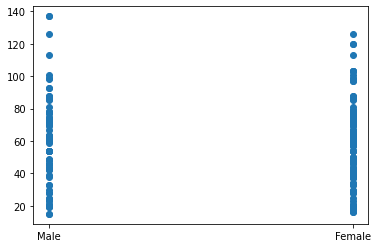

In [11]:
plt.scatter(df.gender,df.income)

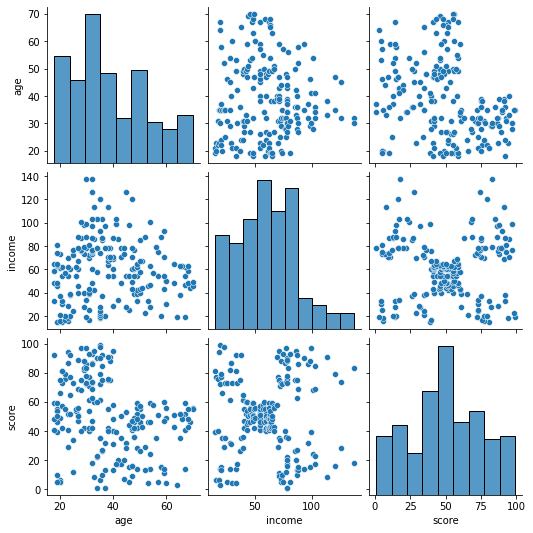

In [12]:
#we can check features relationship by pairplot
sns.pairplot(df[['age','income','score']])

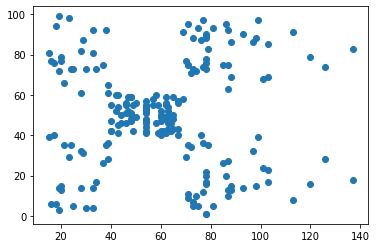

In [13]:
#we can try by income and score
plt.scatter(df.income,df.score)

In [14]:
from sklearn.cluster import KMeans

In [15]:
Kmeans = KMeans()

In [16]:
Kmeans.fit(df[['income','score']])

KMeans()

In [17]:
#Now we can check the clusters of this model
Kmeans.predict(df[['income','score']])

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 5, 7, 5, 3, 5, 3, 5,
       7, 5, 3, 5, 3, 5, 3, 5, 3, 5, 7, 5, 3, 5, 7, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 7, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2])

In [18]:
#cresting a new column in our data set
df['predicted cluster'] = Kmeans.predict(df[['income','score']])

In [19]:
df.head()

,gender,age,income,score,predicted cluster
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0


In [20]:
#now if we want to see centroid of each cluster
cenrtroid = Kmeans.cluster_centers_

In [21]:
#Since default value of k is 8
print(cenrtroid)

[[ 25.14285714  19.52380952]
 [ 47.72340426  50.82978723]
 [109.7         82.        ]
 [ 80.18181818  12.68181818]
 [ 25.0952381   80.04761905]
 [ 78.55172414  82.17241379]
 [109.7         22.        ]
 [ 64.45        46.45      ]]


# vizualization

In [22]:
df0=df[df['predicted cluster']==0]
df1=df[df['predicted cluster']==1]
df2=df[df['predicted cluster']==2]
df3=df[df['predicted cluster']==3]
df4=df[df['predicted cluster']==4]
df5=df[df['predicted cluster']==5]
df6=df[df['predicted cluster']==6]
df7=df[df['predicted cluster']==7]

In [64]:
#now if we want to see centroid of each cluster
center = Kmeans.cluster_centers_

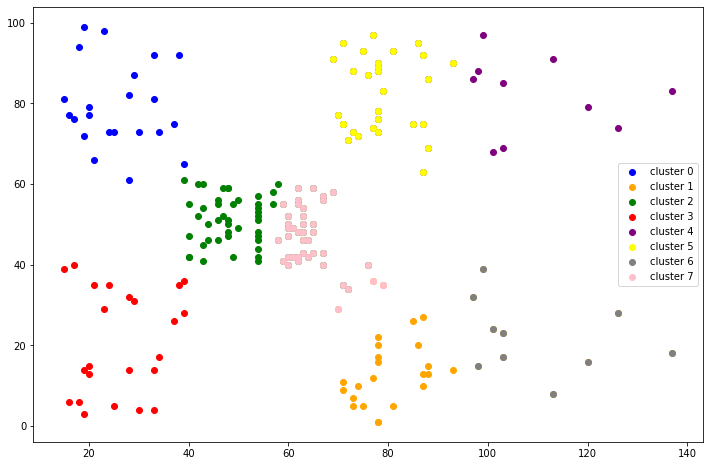

In [65]:
plt.figure(figsize=(12,8))
plt.scatter(df0['income'],df0['score'],color='blue',label='cluster 0')
plt.scatter(df1['income'],df1['score'],color='orange',label='cluster 1')
plt.scatter(df2['income'],df2['score'],color='green',label='cluster 2')
plt.scatter(df3['income'],df3['score'],color='red',label='cluster 3')
plt.scatter(df4['income'],df4['score'],color='purple',label='cluster 4')
plt.scatter(df5['income'],df5['score'],color='yellow',label='cluster 5')
plt.scatter(df6['income'],df6['score'],color='gray',label='cluster 6')
plt.scatter(df7['income'],df7['score'],color='pink',label='cluster 7')
plt.legend()

# Tuning

In [27]:
#Since our default value is 8, that means automatically data set will be split into 8 clusters
#But if we do tuning it then we will understand exact cluster number
#this method name is wcss(within-cluster sum of square),which provide elbow shape



In [28]:
wcss=[]
clusters = range(1,18)

for k in clusters:
    k_cluster =KMeans(n_clusters=k) #shift+Tab press for watching parameter
    k_cluster.fit(df[['income','score']])
    wcss.append(k_cluster.inertia_)#Inertia measures how well a dataset was clustered by K-Means

In [29]:
wcss

[269981.28000000014,
 183499.07470288622,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30227.60651315203,
 25012.917069885472,
 22122.192456961642,
 19653.383606248837,
 17508.97057740007,
 15809.102451553252,
 14320.918182339492,
 12797.180630643868,
 11986.234233449477,
 11081.533982322022,
 10220.77933479564]

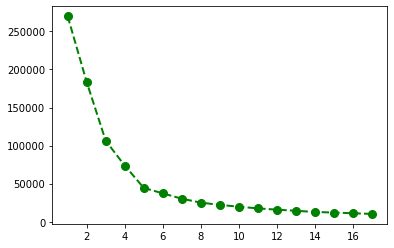

In [41]:
#we can check it graphically
plt.plot(clusters,wcss,'go--',linewidth=2,markersize=8)

In [42]:
#From this graph we can easily understand upto 5 cluster dataset rapidly decreased

In [52]:
#if we want to see exact number we can check it by anothor system
from kneed import KneeLocator

In [54]:
kn=KneeLocator(clusters,wcss,curve='convex',direction='decreasing')

In [55]:
kn.knee

5

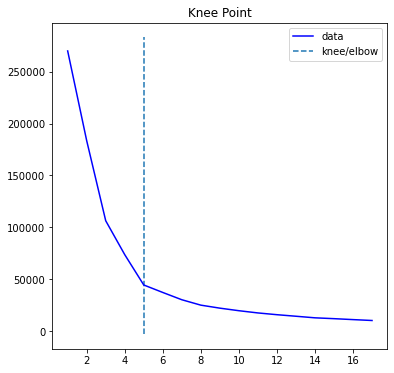

In [56]:
kn.plot_knee()

# Now we can take K=5

In [57]:
Kmeans5 = KMeans(n_clusters=5)

In [58]:
Kmeans5.fit(df[['income','score']])

KMeans(n_clusters=5)

In [59]:
#Now we can check the clusters of this model
Kmeans5.predict(df[['income','score']])

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2,
       3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 4, 2, 4, 1, 4, 1, 4,
       2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [60]:
df['predicted cluster(K=5)']=Kmeans5.predict(df[['income','score']])

In [61]:
df.head()

,gender,age,income,score,predicted cluster,predicted cluster(K=5)
0,Male,19,15,39,0,3
1,Male,21,15,81,4,0
2,Female,20,16,6,0,3
3,Female,23,16,77,4,0
4,Female,31,17,40,0,3


# vizualization

In [62]:
df0=df[df['predicted cluster(K=5)']==0]
df1=df[df['predicted cluster(K=5)']==1]
df2=df[df['predicted cluster(K=5)']==2]
df3=df[df['predicted cluster(K=5)']==3]
df4=df[df['predicted cluster(K=5)']==4]

In [67]:
#center for new data set
center5 = Kmeans5.cluster_centers_

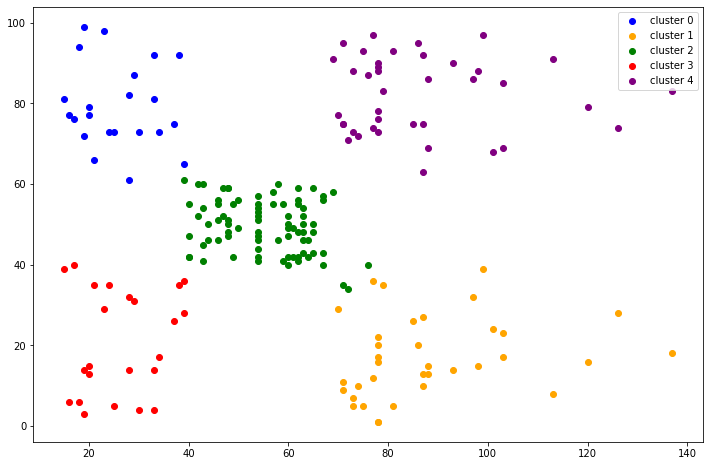

In [63]:
plt.figure(figsize=(12,8))
plt.scatter(df0['income'],df0['score'],color='blue',label='cluster 0')
plt.scatter(df1['income'],df1['score'],color='orange',label='cluster 1')
plt.scatter(df2['income'],df2['score'],color='green',label='cluster 2')
plt.scatter(df3['income'],df3['score'],color='red',label='cluster 3')
plt.scatter(df4['income'],df4['score'],color='purple',label='cluster 4')
plt.legend()

In [68]:
#checking new centers
Kmeans5.cluster_centers_

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513]])

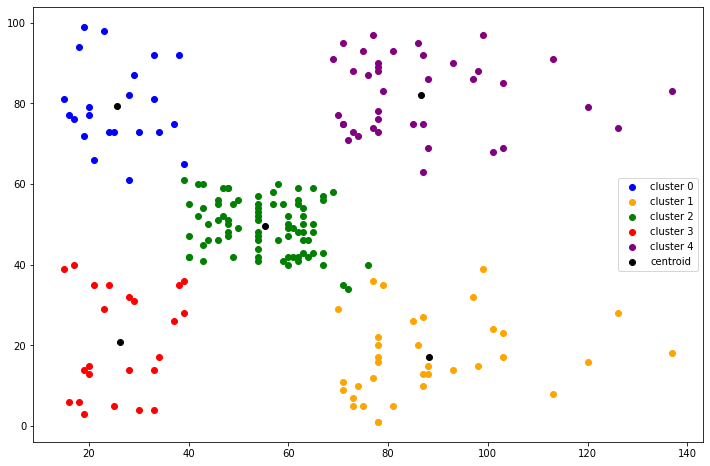

In [70]:
#now we can use centers in our graph
plt.figure(figsize=(12,8))
plt.scatter(df0['income'],df0['score'],color='blue',label='cluster 0')
plt.scatter(df1['income'],df1['score'],color='orange',label='cluster 1')
plt.scatter(df2['income'],df2['score'],color='green',label='cluster 2')
plt.scatter(df3['income'],df3['score'],color='red',label='cluster 3')
plt.scatter(df4['income'],df4['score'],color='purple',label='cluster 4')
plt.scatter(center5[:,0],center5[:,1],color='black',label='centroid')
plt.legend()

In [76]:
#prediction
Kmeans5.predict([[100,150]])

array([4])

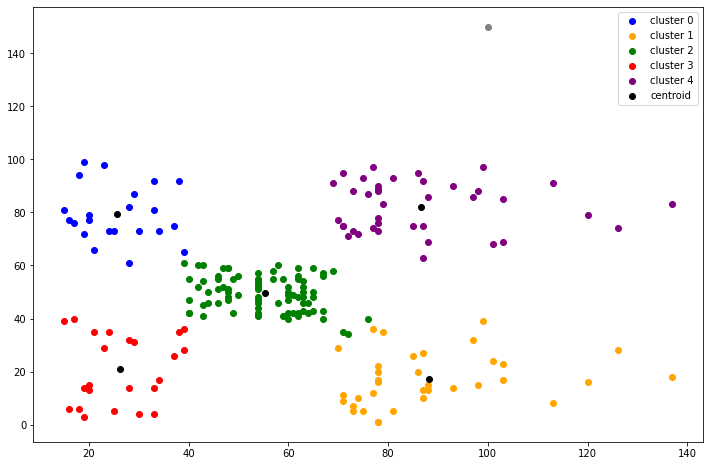

In [78]:
plt.figure(figsize=(12,8))
plt.scatter(df0['income'],df0['score'],color='blue',label='cluster 0')
plt.scatter(df1['income'],df1['score'],color='orange',label='cluster 1')
plt.scatter(df2['income'],df2['score'],color='green',label='cluster 2')
plt.scatter(df3['income'],df3['score'],color='red',label='cluster 3')
plt.scatter(df4['income'],df4['score'],color='purple',label='cluster 4')
plt.scatter(center5[:,0],center5[:,1],color='black',label='centroid')
plt.scatter(100,150,color='gray')#for showing predicting data
plt.legend()

# important note

In [ ]:
#Here,we have done only for two features, but if we want to use more features value we will add more features 